# Deep Learning, Homework 1, Gurram Manoj Reddy

## 1) Varying the size of the first layer and recording their accuracies

### Loading the MNIST dataset from keras

In [1]:
from tensorflow.keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### Creating a 6*2 matrix which will store the accuracies and their input layer sizes

In [8]:
import numpy as np
Accuracy_matrix=np.zeros((6,2))
Accuracy_matrix[0][0]=16
Accuracy_matrix[1][0]=32
Accuracy_matrix[2][0]=64
Accuracy_matrix[3][0]=128
Accuracy_matrix[4][0]=256
Accuracy_matrix[5][0]=512
print(Accuracy_matrix)

[[ 16.   0.]
 [ 32.   0.]
 [ 64.   0.]
 [128.   0.]
 [256.   0.]
 [512.   0.]]


### Building 6 different models for 6 different Input Layer Sizes

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

In [10]:
model1=keras.Sequential([
    layers.Dense(16,activation="relu"),
    layers.Dense(10,activation="softmax")
])
model2=keras.Sequential([
    layers.Dense(32,activation="relu"),
    layers.Dense(10,activation="softmax")
])
model3=keras.Sequential([
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")
])
model4=keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(10,activation="softmax")
])
model5=keras.Sequential([
    layers.Dense(256,activation="relu"),
    layers.Dense(10,activation="softmax")
])
model6=keras.Sequential([
    layers.Dense(512,activation="relu"),
    layers.Dense(10,activation="softmax")
])

### Compiling the Networks

In [11]:
model1.compile(optimizer="rmsprop",
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy"])
model2.compile(optimizer="rmsprop",
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy"])
model3.compile(optimizer="rmsprop",
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy"])
model4.compile(optimizer="rmsprop",
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy"])
model5.compile(optimizer="rmsprop",
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy"])
model6.compile(optimizer="rmsprop",
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy"])

### Preparing the Image Data

In [12]:
train_images=train_images.reshape(60000,28*28)
train_images=train_images.astype("float32")/255
test_images=test_images.reshape(10000,28*28)
test_images=test_images.astype("float32")/255

### Training the Networks

In [13]:
model1.fit(train_images, train_labels, epochs=5, batch_size=128)
model2.fit(train_images, train_labels, epochs=5, batch_size=128)
model3.fit(train_images, train_labels, epochs=5, batch_size=128)
model4.fit(train_images, train_labels, epochs=5, batch_size=128)
model5.fit(train_images, train_labels, epochs=5, batch_size=128)
model6.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 1ms/step - loss: 0.5941 - accuracy: 0.8441
Epoch 2/5
469/469 [==============================] - 1s 1ms/step - loss: 0.2938 - accuracy: 0.9179
Epoch 3/5
469/469 [==============================] - 1s 1ms/step - loss: 0.2595 - accuracy: 0.9270
Epoch 4/5
469/469 [==============================] - 1s 1ms/step - loss: 0.2376 - accuracy: 0.9330
Epoch 5/5
469/469 [==============================] - 1s 1ms/step - loss: 0.2214 - accuracy: 0.9380
Epoch 1/5
469/469 [==============================] - 1s 1ms/step - loss: 0.4620 - accuracy: 0.8779
Epoch 2/5
469/469 [==============================] - 1s 1ms/step - loss: 0.2495 - accuracy: 0.9294
Epoch 3/5
469/469 [==============================] - 1s 1ms/step - loss: 0.2092 - accuracy: 0.9402
Epoch 4/5
469/469 [==============================] - 1s 1ms/step - loss: 0.1841 - accuracy: 0.9467
Epoch 5/5
469/469 [==============================] - 1s 1ms/step - loss: 0.1622 - accuracy: 0.9538
Epoch 1/5


### Testing the networks and Storing their accuracies in Accuracy_matrix

In [14]:
test_loss, test_acc = model1.evaluate(test_images, test_labels)
Accuracy_matrix[0][1]=test_acc

test_loss, test_acc = model2.evaluate(test_images, test_labels)
Accuracy_matrix[1][1]=test_acc

test_loss, test_acc = model3.evaluate(test_images, test_labels)
Accuracy_matrix[2][1]=test_acc

test_loss, test_acc = model4.evaluate(test_images, test_labels)
Accuracy_matrix[3][1]=test_acc

test_loss, test_acc = model5.evaluate(test_images, test_labels)
Accuracy_matrix[4][1]=test_acc

test_loss, test_acc = model6.evaluate(test_images, test_labels)
Accuracy_matrix[5][1]=test_acc

print(Accuracy_matrix)

313/313 [==============================] - 0s 1ms/step - loss: 0.0736 - accuracy: 0.9779
[[ 16.           0.93489999]
 [ 32.           0.95300001]
 [ 64.           0.96490002]
 [128.           0.97460002]
 [256.           0.97850001]
 [512.           0.97790003]]


### Plotting the Accuracies

[16.0, 32.0, 64.0, 128.0, 256.0, 512.0]


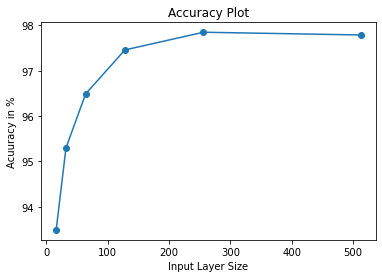

In [15]:
import matplotlib.pyplot as plt
x_values = [row[0] for row in Accuracy_matrix]
y_values = [row[1] for row in Accuracy_matrix*100]
print(x_values)
plt.plot(x_values,y_values,marker='o',linestyle='-')
plt.xlabel("Input Layer Size")
plt.ylabel("Acuuracy in %")
plt.title("Accuracy Plot")
plt.show()

## 2) Varying the number of layers in the given network and recording their accuracies

### Creating the Accuracy_matrix to store the acccuracies for different networks

In [16]:
# 1st Column contains the number of layers in the network and second column contains their accuracies.
Accuracy_matrix=np.zeros((4,2))
Accuracy_matrix[0][0]=2
Accuracy_matrix[1][0]=3
Accuracy_matrix[2][0]=4
Accuracy_matrix[3][0]=5
print(Accuracy_matrix)

[[2. 0.]
 [3. 0.]
 [4. 0.]
 [5. 0.]]


### Building the Networks with different number of layers

In [17]:
Model1=keras.Sequential([
    layers.Dense(10,activation="relu"),
    layers.Dense(10,activation="softmax")
])
Model2=keras.Sequential([
    layers.Dense(512,activation="relu"),
    layers.Dense(512,activation="relu"),
    layers.Dense(10,activation="softmax")
])
Model3=keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(64,activation="relu"),
    layers.Dense(32,activation="relu"),
    layers.Dense(10,activation="softmax")
])
Model4=keras.Sequential([
    layers.Dense(512,activation="relu"),
    layers.Dense(256,activation="relu"),
    layers.Dense(128,activation="relu"),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")
])

### Compiling the Networks

In [18]:
Model1.compile(optimizer="rmsprop",
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy"])
Model2.compile(optimizer="rmsprop",
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy"])
Model3.compile(optimizer="rmsprop",
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy"])
Model4.compile(optimizer="rmsprop",
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy"])

### Training the Networks

In [19]:
Model1.fit(train_images, train_labels, epochs=5, batch_size=128)
Model2.fit(train_images, train_labels, epochs=5, batch_size=128)
Model3.fit(train_images, train_labels, epochs=5, batch_size=128)
Model4.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 1ms/step - loss: 0.8015 - accuracy: 0.7670
Epoch 2/5
469/469 [==============================] - 1s 1ms/step - loss: 0.3560 - accuracy: 0.9000
Epoch 3/5
469/469 [==============================] - 1s 1ms/step - loss: 0.3053 - accuracy: 0.9130
Epoch 4/5
469/469 [==============================] - 1s 1ms/step - loss: 0.2835 - accuracy: 0.9195
Epoch 5/5
469/469 [==============================] - 1s 1ms/step - loss: 0.2708 - accuracy: 0.9233
Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.2227 - accuracy: 0.9305
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0830 - accuracy: 0.9745
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0538 - accuracy: 0.9833
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0384 - accuracy: 0.9880
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0289 - accuracy: 0.9913
Epoch 1/5


### Testing the Networks and Storing their Accuracies

In [20]:
test_loss, test_acc = Model1.evaluate(test_images, test_labels)
Accuracy_matrix[0][1]=test_acc

test_loss, test_acc = Model2.evaluate(test_images, test_labels)
Accuracy_matrix[1][1]=test_acc

test_loss, test_acc = Model3.evaluate(test_images, test_labels)
Accuracy_matrix[2][1]=test_acc

test_loss, test_acc = Model4.evaluate(test_images, test_labels)
Accuracy_matrix[3][1]=test_acc

313/313 [==============================] - 1s 2ms/step - loss: 0.0843 - accuracy: 0.9807


### Plotting the Graph

[2.0, 3.0, 4.0, 5.0]


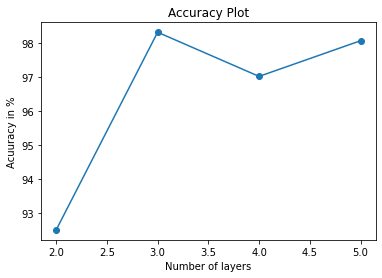

In [21]:
import matplotlib.pyplot as plt
x_values = [row[0] for row in Accuracy_matrix]
y_values = [row[1] for row in Accuracy_matrix*100]
print(x_values)
plt.plot(x_values,y_values,marker='o',linestyle='-')
plt.xlabel("Number of layers")
plt.ylabel("Acuuracy in %")
plt.title("Accuracy Plot")
plt.show()

#### Network with 2 layers have 10,10 neurons respectively

#### Network with 3 layers have 512,512,10 neurons respectively

#### Network with 4 layers have 128,64,32,10 neurons respectively

#### Network with 5 layeers have 512,256,128,64,10 neurons respectively